# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [5]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
anyio                        4.2.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.11.0
beautifulsoup4               4.12.3
bleach                       4.1.0
Brotli                       1.0.9
cachetools                   5.4.0
certifi                      2024.7.4
cffi                         1.16.0
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.1
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.6.7
decorator                    5.1.1
defusedxml                   0.7.1
exceptiongroup               1.2.0
executing                    0.8.3
fastjsonschema               2.16.2
f

In [9]:
pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.4/38.8 MB 6.3 MB/s eta 0:00:07
   - -------------------------------------- 1.0/38.8 MB 9.1 MB/s eta 0:00:05
   - -------------------------------------- 1.5/38.8 MB 9.8 MB/s eta 0:00:04
   -- ------------------------------------- 2.1/38.8 MB 10.5 MB/s eta 0:00:04
   -- ------------------------------------- 2.8/38.8 MB 10.4 MB/s eta 0:00:04
   --- ------------------------------------ 3.3/38.8 MB 11.0 MB/s eta 0:00:04
   --- ------------------------------------ 3.8/38.8 MB 10.9 MB/s eta 0:00:04
   ---- ----------------------------------- 4.3/38.8 MB 11.4 MB/s eta 0:00:04
   ---- ----------------------------------- 4.7/38.8 MB 11.2 MB/s eta 0:00:04
   ----- ---------------------------------- 5.2/38.8 MB 11.1 MB/s eta 0:00:04
   ----- ---------------------------------- 5.7/38.8 MB 11.3 MB/s eta 0:00:0

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [10]:
import cv2
import imghdr

In [11]:
data_dir = r"D:\LMT database\LMT-108\ImageScans\NoFlash\data"

In [12]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [13]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 2160 files belonging to 108 classes.


In [16]:
data_iterator = data.as_numpy_iterator()

In [19]:
batch = data_iterator.next()

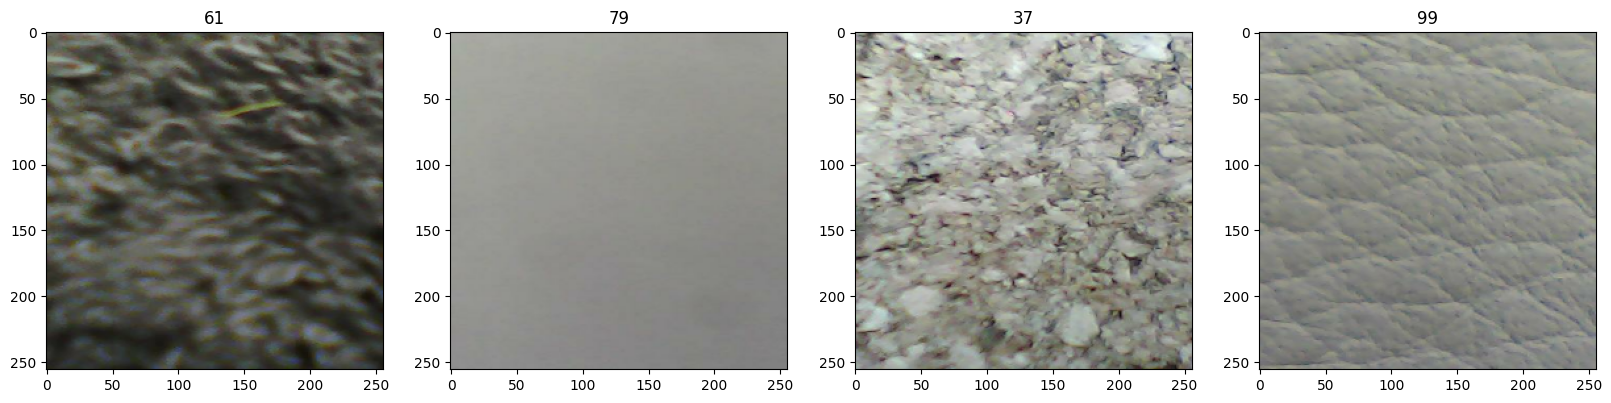

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [21]:
data = data.map(lambda x,y: (x/255, y))

In [22]:
data.as_numpy_iterator().next()

(array([[[[0.5751838 , 0.5835784 , 0.49359682],
          [0.57264096, 0.5861826 , 0.49362746],
          [0.560386  , 0.57959557, 0.48489583],
          ...,
          [0.71501225, 0.7282475 , 0.6856005 ],
          [0.7       , 0.71568626, 0.659712  ],
          [0.6818934 , 0.6975797 , 0.6390319 ]],
 
         [[0.5714154 , 0.58440566, 0.46577817],
          [0.5727635 , 0.5877757 , 0.46813726],
          [0.5677083 , 0.5909926 , 0.46721813],
          ...,
          [0.70465684, 0.71789217, 0.66988355],
          [0.6997549 , 0.71544117, 0.6560968 ],
          [0.6865196 , 0.7022059 , 0.63621324]],
 
         [[0.5758272 , 0.58094364, 0.447212  ],
          [0.568413  , 0.5818934 , 0.44537377],
          [0.565962  , 0.58480394, 0.44583333],
          ...,
          [0.7004902 , 0.71617645, 0.6598039 ],
          [0.69022673, 0.705913  , 0.6421875 ],
          [0.6752451 , 0.69436276, 0.61740196]],
 
         ...,
 
         [[0.44289216, 0.44754902, 0.4201593 ],
          [0.44871

# 5. Split Data

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [24]:
train_size

47

In [25]:
val_size

13

In [26]:
test_size

6

In [27]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [28]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [42]:
model = Sequential()

In [43]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(108, activation='softmax'))

In [44]:
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)      

# 7. Train

In [46]:
logdir='logs'

In [47]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [48]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
47/47 [==============================] - 15s 101ms/step - loss: 4.5760 - accuracy: 0.0293 - val_loss: 4.0404 - val_accuracy: 0.1058
Epoch 2/20
47/47 [==============================] - 5s 96ms/step - loss: 3.6168 - accuracy: 0.1316 - val_loss: 3.1651 - val_accuracy: 0.2284
Epoch 3/20
47/47 [==============================] - 5s 98ms/step - loss: 2.6931 - accuracy: 0.3178 - val_loss: 2.5981 - val_accuracy: 0.3317
Epoch 4/20
47/47 [==============================] - 5s 98ms/step - loss: 2.0579 - accuracy: 0.4701 - val_loss: 2.0846 - val_accuracy: 0.4111
Epoch 5/20
47/47 [==============================] - 5s 97ms/step - loss: 1.6827 - accuracy: 0.5572 - val_loss: 2.0500 - val_accuracy: 0.4663
Epoch 6/20
47/47 [==============================] - 5s 97ms/step - loss: 1.3465 - accuracy: 0.6316 - val_loss: 1.4440 - val_accuracy: 0.5841
Epoch 7/20
47/47 [==============================] - 5s 97ms/step - loss: 1.1866 - accuracy: 0.6775 - val_loss: 1.6698 - val_accuracy: 0.5553
Epoch 8/20


# 8. Plot Performance

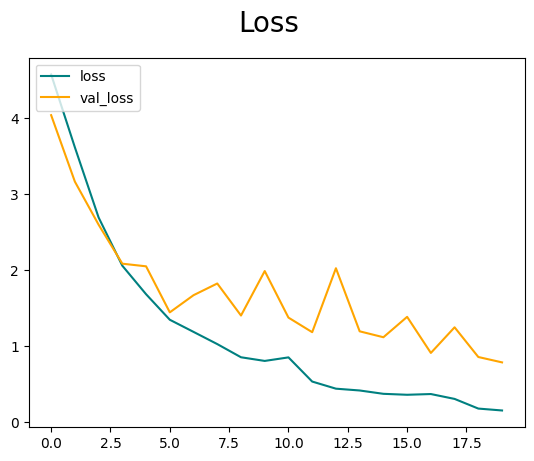

In [49]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

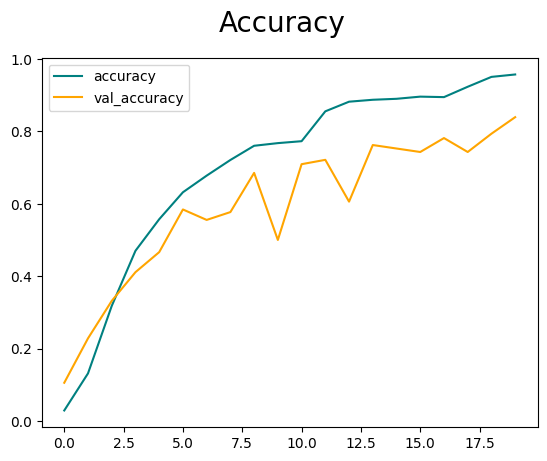

In [50]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [51]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(test)
print(f'Test accuracy: {test_acc}')

6/6 [==============================] - 2s 36ms/step - loss: 0.8758 - accuracy: 0.8021
Test accuracy: 0.8020833134651184


# 9. Evaluate

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [33]:
import cv2

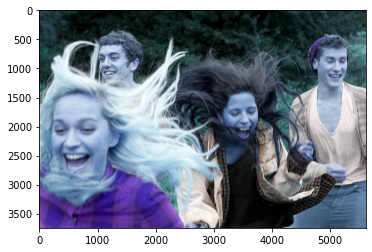

In [39]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

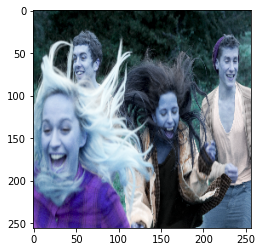

In [40]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [41]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [42]:
yhat

array([[0.01972741]], dtype=float32)

In [43]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models','imageclassifier.h5'))

In [46]:
new_model = load_model('imageclassifier.h5')

In [47]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)